# **분포**

## 카테고리분포

베르누이 분포 : 동전 0,1인 분포

카테고리 확률분포 : 주사위. 0,1만을 가지는 변수가 아닌 변수들에 대한 확률 분포

x = {1,2,3,4,5,6}

x = 1 → {1,0,0,0,0,0}

x = 2 → {0,1,0,0,0,0}

x = 3 → {0,0,1,0,0,0}

x = 4 → {0,0,0,1,0,0}

x = 5 → {0,0,0,0,1,0}

x = 6 → {0,0,0,0,0,1}

$$ \Sigma{x_k} = 1$$
카테고리 분포의 모수는 
$$μ = ({μ_1}, ⋅ ⋅ ⋅, {\mu_k}) $$
$$0<=\mu<=1$$
$$\Sigma{\mu_k} = 1$$

카테고리 확률 분포
$$Cat({x_1}, {x_2}, ⋅ ⋅ ⋅, {x_k}, {\mu_1}, ⋅ ⋅ ⋅, {\mu_k})$$
$$Cat(x:\mu)$$

$$ Cat(x:\mu) = {\mu_1}\quad if\quad x = (1,0,0,⋅ ⋅ ⋅,0) \quad
{\mu_2}\quad if\quad x = (0,1,0,⋅ ⋅ ⋅,0) ⋅ ⋅ ⋅$$

$$Cat(x:\mu) = {\mu_1^{x_1}}{\mu_2^{x_3}}⋅⋅⋅{\mu_k^{x_k}} = \prod_{k=1}^K \mu_k^{x_k}$$

카테고리 분포의 기댓값
$$E[{x_k}] = \mu_k$$
카테고리 분포의 분산
$$Var[{x_k}] = \mu_k(1-\mu_k)$$

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.2 MB/s 


In [ ]:
from sklearn.datasets import load_iris
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from matplotlib.colorbar import constrained_layout
from scipy.integrate import simps
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import koreanize_matplotlib
import string
import scipy as sp
import random
import statsmodels.api as sm
import missingno as msno
import patsy
import warnings
from patsy import demo_data
from patsy import dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

In [ ]:
import scipy as sp
import scipy.stats
mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(1,mu)

In [ ]:
import numpy as np
import pandas as pd
xx = np.arange(1,7)

# one-hot vector로 바꾸기
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


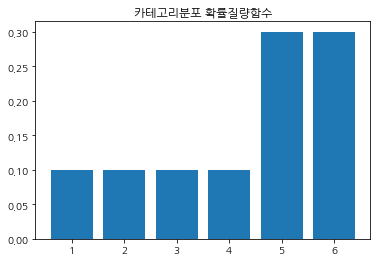

In [ ]:
import matplotlib.pyplot as plt
plt.bar(xx,rv.pmf(xx_ohe.values))
plt.title('카테고리분포 확률질량함수')
plt.show()

In [ ]:
np.random.seed(0)
X = rv.rvs(100)
# X

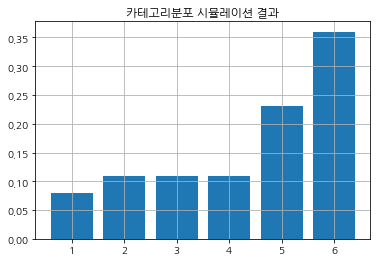

In [ ]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,7),y)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame({'이론' : rv.pmf(xx_ohe.values),'시뮬레이션' : y}, index=np.arange(1,7)).stack()

In [ ]:
df = df.reset_index()
df.columns = ['표본','유형','비율']
df.pivot('표본','유형','비율')
df

,표본,유형,비율
0,1,이론,0.10
1,1,시뮬레이션,0.08
2,2,이론,0.10
3,2,시뮬레이션,0.11
4,3,이론,0.10
5,3,시뮬레이션,0.11
6,4,이론,0.10
7,4,시뮬레이션,0.11
8,5,이론,0.30
9,5,시뮬레이션,0.23


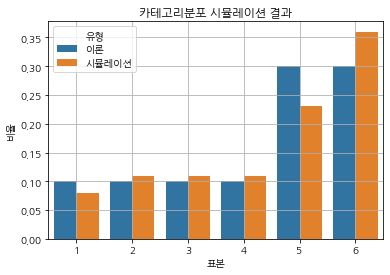

In [ ]:
import seaborn as sns
sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

#### 실습
μ = (0.2, 0.2, 0.15, 0.05, 0.2, 0.1, 0.1)

표본 10개, 1000개 비교하시오

In [ ]:
μ = (0.2, 0.2, 0.15, 0.05, 0.2, 0.1, 0.1)
rv = sp.stats.multinomial(1,μ)
xx = np.arange(1,8)

# one-hot vector로 바꾸기
xx_ohe = pd.get_dummies(xx)

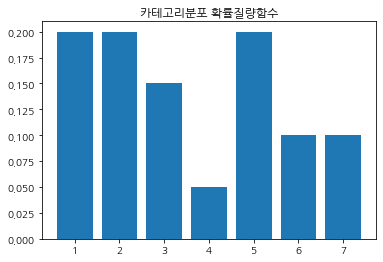

In [ ]:
plt.bar(xx,rv.pmf(xx_ohe.values))
plt.title('카테고리분포 확률질량함수')
plt.show()

In [ ]:
np.random.seed(0)
X = rv.rvs(10)

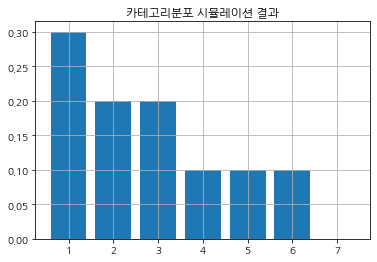

In [ ]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,8),y)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame({'이론' : rv.pmf(xx_ohe.values),'시뮬레이션' : y}, index=np.arange(1,8)).stack()

In [ ]:
df = df.reset_index()
df.columns = ['표본','유형','비율']
df.pivot('표본','유형','비율')
df

,표본,유형,비율
0,1,이론,0.20
1,1,시뮬레이션,0.30
2,2,이론,0.20
3,2,시뮬레이션,0.20
4,3,이론,0.15
5,3,시뮬레이션,0.20
6,4,이론,0.05
7,4,시뮬레이션,0.10
8,5,이론,0.20
9,5,시뮬레이션,0.10


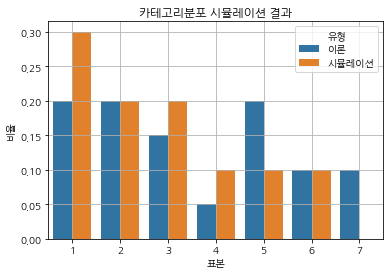

In [ ]:
import seaborn as sns
sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

In [ ]:
np.random.seed(0)
X = rv.rvs(1000)

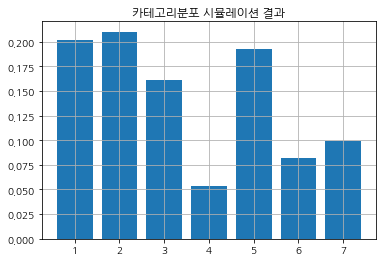

In [ ]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,8),y)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame({'이론' : rv.pmf(xx_ohe.values),'시뮬레이션' : y}, index=np.arange(1,8)).stack()

In [ ]:
df = df.reset_index()
df.columns = ['표본','유형','비율']
df.pivot('표본','유형','비율')
df

,표본,유형,비율
0,1,이론,0.200
1,1,시뮬레이션,0.202
2,2,이론,0.200
3,2,시뮬레이션,0.210
4,3,이론,0.150
5,3,시뮬레이션,0.161
6,4,이론,0.050
7,4,시뮬레이션,0.054
8,5,이론,0.200
9,5,시뮬레이션,0.192


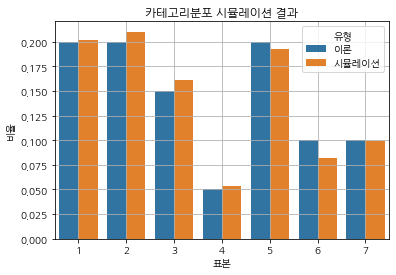

In [ ]:
import seaborn as sns
sns.barplot(x='표본', y='비율', hue='유형', data=df)
plt.title('카테고리분포 시뮬레이션 결과')
plt.grid()
plt.show()

# **다중 분류 문제**

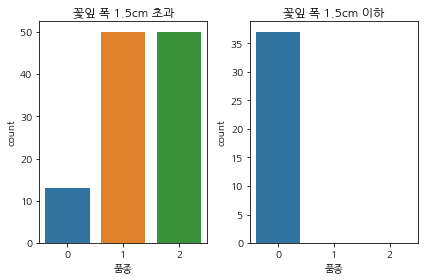

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')

df1 = df[df['petal length (cm)']> 1.5]
df2 = df[df['petal length (cm)']<= 1.5]

fig, ax = plt.subplots(1,2)
sns.countplot(x='품종', data=df1, ax=ax[0]).set_title('꽃잎 폭 1.5cm 초과')
sns.countplot(x='품종', data=df2, ax=ax[1]).set_title('꽃잎 폭 1.5cm 이하')
plt.tight_layout()
plt.show()

## 다항분포
베르누이를 여러번 실험 → 이항 분포   
카테고리 확률 변수가 여러개 → 다항분포   
K개인 카테고리 확률변수의 표본을 N개 있을 때 각각의 카테고리k가 ${x_k}$번 나올 확률 분포

- 다항분포의 확률질량함수
$$ Mu(x;N,μ) = \binom N x \prod_{k=1}^K{\mu_k}^{x_k}$$

- 기대값
$$E[{x_k}]=N_{\mu_k}$$

- 분산
$$Var[{x_k}] = {N_{μ_k}}(1-{\mu_k})$$


In [ ]:
N=30 # 실험의 횟수가 변수가 됨
mu=[0.1,0.1,0.1,0.1,0.3,0.3]
rv = scipy.stats.multinomial(N,mu)
np.random.seed(0)
X=rv.rvs(100)
X[:5]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9]])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; y

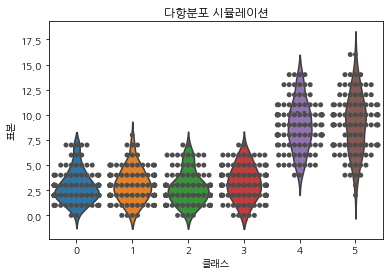

In [ ]:
df=pd.DataFrame(X).stack().reset_index()
df.columns = ['N','클래스','표본']

sns.violinplot(x='클래스', y='표본', data=df, inner='quartile')
sns.swarmplot(x='클래스',y='표본', data=df, color='.3')
plt.title('다항분포 시뮬레이션')
plt.show()

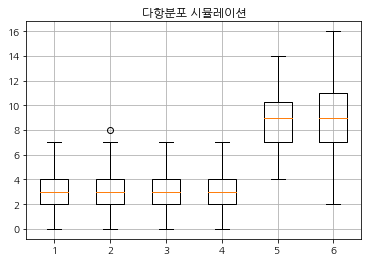

In [ ]:
plt.boxplot(X)
plt.title('다항분포 시뮬레이션')
plt.grid()
plt.show()

## 베타 분포
데이터의 분포를 표현하는 분포가 아닌 모수값 추정 시 신뢰도를 표현하는데 사용   
모수 a, b   
표본 공간 0~1 실수

확률밀도함수
$$Beta(x;a,b)$$

- 기댓값
$$E[x] = \frac{a}{a+b}$$

- 최빈값
$$mode = \frac{a-1}{a+b-2}$$

- 분산
$$Var[x] = \frac{ab}{({(a+b)}^2(a+b+1)}$$

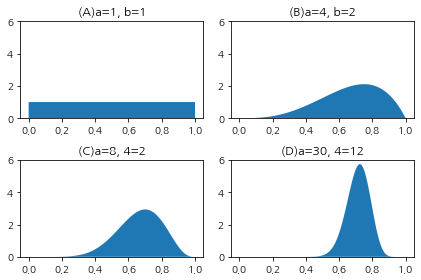

In [ ]:
xx = np.linspace(0,1,1000)

plt.subplot(221)
plt.fill_between(xx, scipy.stats.beta(1,1).pdf(xx))
plt.ylim(0,6)
plt.title('(A)a=1, b=1')

plt.subplot(222)
plt.fill_between(xx,scipy.stats.beta(4,2).pdf(xx))
plt.ylim(0,6)
plt.title('(B)a=4, b=2')

plt.subplot(223)
plt.fill_between(xx,scipy.stats.beta(8,4).pdf(xx))
plt.ylim(0,6)
plt.title('(C)a=8, 4=2')

plt.subplot(224)
plt.fill_between(xx,scipy.stats.beta(30,12).pdf(xx))
plt.ylim(0,6)
plt.title('(D)a=30, 4=12')

plt.tight_layout()
plt.show()

## 감마분포
베타분포와 달리 0 ~ 무한의 표본을 사용

- 기대값
$$E[X]=\frac{a}{b}$$
- 최빈값
$$mode=\frac{a-1}{b}$$
- 분산
$$Var[X]=\frac{a}{b^2}$$

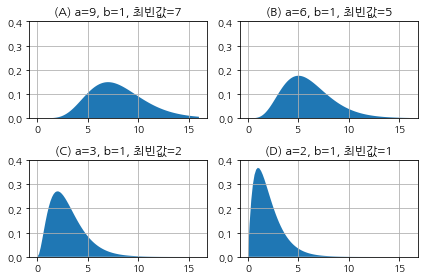

In [ ]:
xx = np.linspace(0,16,100)

plt.subplot(221)
plt.fill_between(xx, scipy.stats.gamma(8).pdf(xx))
plt.ylim(0,0.4)
plt.title("(A) a=9, b=1, 최빈값=7")
plt.grid()

plt.subplot(222)
plt.fill_between(xx, scipy.stats.gamma(6).pdf(xx))
plt.ylim(0,0.4)
plt.title("(B) a=6, b=1, 최빈값=5")
plt.grid()

plt.subplot(223)
plt.fill_between(xx, scipy.stats.gamma(3).pdf(xx))
plt.ylim(0,0.4)
plt.title("(C) a=3, b=1, 최빈값=2")
plt.grid()

plt.subplot(224)
plt.fill_between(xx, scipy.stats.gamma(2).pdf(xx))
plt.ylim(0,0.4)
plt.title("(D) a=2, b=1, 최빈값=1")
plt.grid()

plt.tight_layout()
plt.show()

## 디리클레 분포
- 베타분포의 확장
- 베타분포는 0 ~ 1을가지는 단일 확률변수에 대한 분포   
- 디리클레분포는 0 ~ 1을가지는 다변수 확률변수에 대한 분포   
- 모수 추정시 베이지안 모형에 사용

- 확률밀도함수
$$Dir(x;a)$$

- 조건
$$0<={x_i}<=1,\  \Sigma_{i=1}^K{x_i}=1$$

- 베타분포는 K=2인 디리클레분포라 볼 수 있음